In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
import sklearn.datasets
import sklearn.cluster
import umap
import glob
from PIL import Image

In [37]:
loc = ['chapa/*.jpeg', 'switch/*.jpeg']

for i in range(0,2):
    names = glob.glob(loc[i])
    for element in names:
        image = Image.open(element)
        image.thumbnail((128,128))
        image.save(element)

In [43]:
imagenes = []
labels = []
loc = ['chapa/*.jpeg', 'switch/*.jpeg']

for i in range(0,2):
    names = glob.glob(loc[i])
    for element in names:
        image_ = np.array(np.float_(im.imread(element)))
        imagenes.append(image_)
        labels.append(i)
            
x = np.array(imagenes).reshape((len(imagenes),-1))
labels = labels

print(len(labels))

78


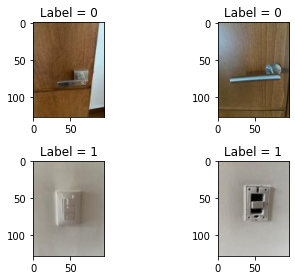

In [39]:
ii = [0,20,60,70]

for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.imshow(np.int_(imagenes[ii[i]]))
    plt.title('Label = {}'.format(labels[ii[i]]))
plt.tight_layout()

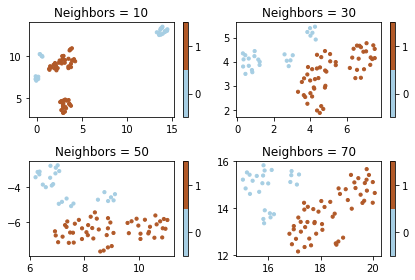

In [46]:
n_neigh = np.linspace(10,70,4)

for i in range(0,4):
    reducer = umap.UMAP(n_neighbors=int(n_neigh[i]))
    reducer.fit(x)
    embedding = reducer.transform(x)
    plt.subplot(2,2,i+1)
    plt.scatter(embedding[:,0], embedding[:,1], c = labels, cmap='Paired', s=10.0)
    plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
    plt.title('Neighbors = {}'.format(int(n_neigh[i])))
plt.tight_layout()

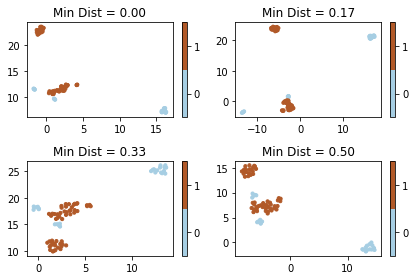

In [47]:
min_dis = np.linspace(0.001,0.5,4)

for i in range(0,4):
    reducer = umap.UMAP(n_neighbors=10, min_dist = min_dis[i])
    reducer.fit(x)
    embedding = reducer.transform(x)
    plt.subplot(2,2,i+1)
    plt.scatter(embedding[:,0], embedding[:,1], c = labels, cmap='Paired', s=10.0)
    plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
    plt.title('Min Dist = {:.2f}'.format(min_dis[i]))
plt.tight_layout()

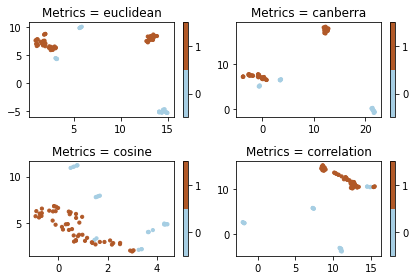

In [48]:
metrics = ['euclidean','canberra','cosine','correlation']

for i in range(0,4):
    reducer = umap.UMAP(n_neighbors=10, min_dist = 0.001, metric = metrics[i])
    reducer.fit(x)
    embedding = reducer.transform(x)
    plt.subplot(2,2,i+1)
    plt.scatter(embedding[:,0], embedding[:,1], c = labels, cmap='Paired', s=10.0)
    plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
    plt.title('Metrics = {}'.format(metrics[i]))
plt.tight_layout()


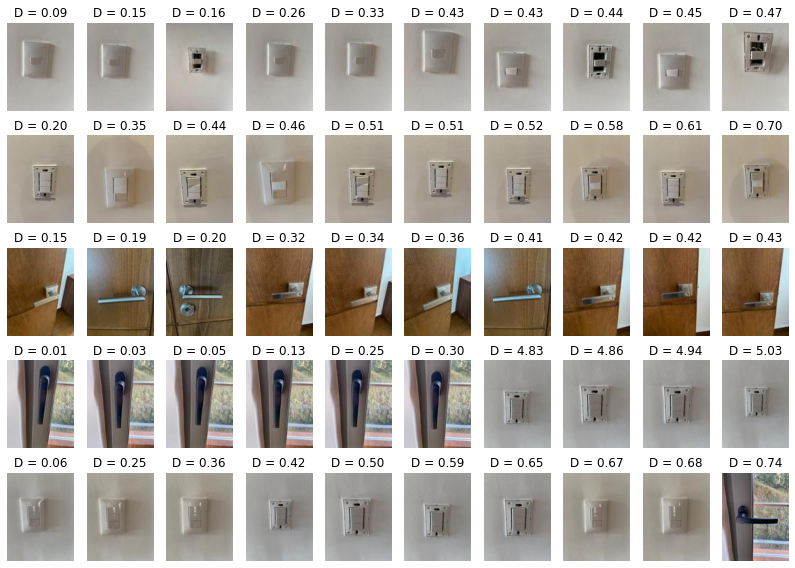

In [50]:
reducer = umap.UMAP(n_neighbors=10, min_dist = 0.001, metric = 'euclidean')
reducer.fit(x)
embedding = reducer.transform(x)
n_clusters = 5
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding)
cluster = k_means.predict(embedding)
distance = k_means.transform(embedding)
plt.figure(figsize=(14,10))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i])
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(np.int_(imagenes[ind]))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cluster
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.linear_model
import sklearn.model_selection
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms